# SUPPORT VECTOR MACHINES

### Import des données et des librairies

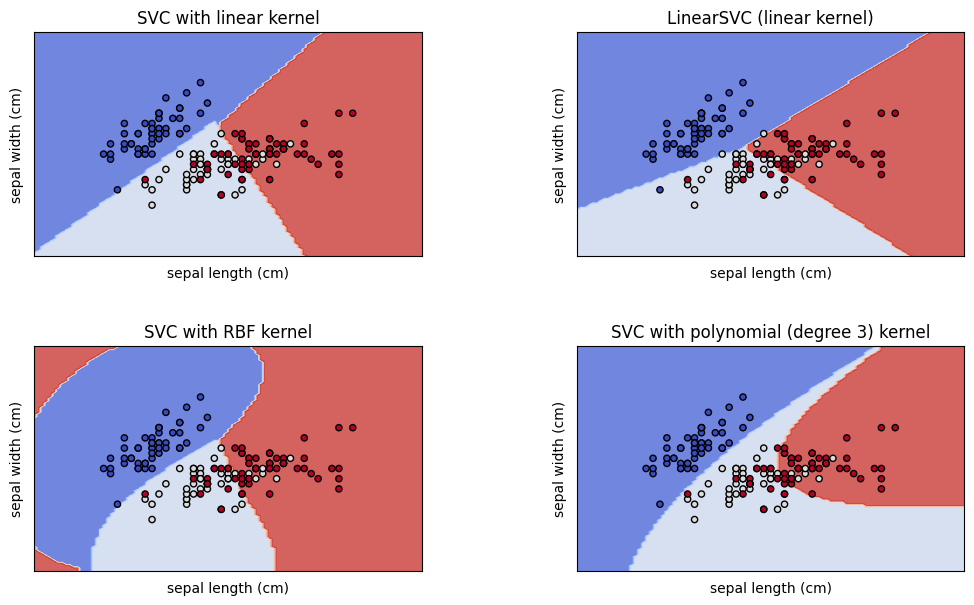

In [2]:
# Import the required libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# Import the Iris dataset
iris = datasets.load_iris()

# Take the first two features.
# We could avoid this by using a two-dimensional dataset
X = iris.data[:, :2]
y = iris.target

# Create SVM models with different kernels and fit the data
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual=True),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)

# Use a generator expression to fit each model
models = (clf.fit(X, y) for clf in models)

# Titles for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set up 2x2 grid for plotting
fig, sub = plt.subplots(2, 2, figsize=(12,7))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
# Extract the two features for plotting
X0, X1 = X[:, 0], X[:, 1]

# plt.figure(figsize=(20,10))

# Iterate over models, create decision boundary displays, and plot
for clf, title, ax in zip(models, titles, sub.flatten()):
    # Create DecisionBoundaryDisplay using the current model
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1] )
    
    # Scatter plot of the data points
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    
# Display the plots
plt.show()

### Pycaret et AutoML

**PyCaret** est une bibliothèque d'**AutoML** (Apprentissage Automatique Automatisé).

L'AutoML vise à **automatiser le processus de construction, de formation et de déploiement de modèles d'apprentissage automatique**, simplifiant ainsi le travail du data scientist et réduisant la nécessité d'une expertise approfondie en la matière.

#### Qu'est-ce que Pycaret?

    PyCaret est une bibliothèque Python conçue pour faciliter le flux de travail de l'apprentissage automatique.
    Elle offre une interface simple et unifiée pour plusieurs tâches d'apprentissage automatique, de la préparation des données à la création de modèles et à l'évaluation des performances.
    PyCaret prend en charge divers types de modèles, notamment la classification, la régression, le regroupement, etc.

Documentation officielle : https://pycaret.readthedocs.io/en/stable/api/classification.html

#### Qu'est-ce que l'AutoML?

    L'AutoML automatise plusieurs étapes du processus d'apprentissage automatique, telles que la sélection de modèles, l'optimisation des hyperparamètres et la validation croisée.
    Cela permet aux praticiens qui ne sont pas des experts en apprentissage automatique de créer rapidement des modèles performants sans avoir besoin d'une expertise approfondie.

#### Utilisation de PyCaret pour l'AutoML

    PyCaret simplifie l'utilisation de l'AutoML en fournissant des fonctions prêtes à l'emploi pour la préparation des données, la création de modèles, l'évaluation des performances, etc.
    Il vous permet de spécifier les tâches que vous souhaitez effectuer et effectue automatiquement les étapes nécessaires en coulisses.

##### Installation de Pycaret

In [3]:
# pip3 install pycaret

##### Import des librairies et packages

In [4]:
# IMPORT DES LIBRAIRIES & PACKAGES
from pycaret.classification import *
import pycaret

##### Afficher la version de Pycaret

In [5]:
print(f"Pycaret version : {pycaret.__version__}")

Pycaret version : 3.2.0


##### Création d'un environnement Pycaret

In [6]:
from pycaret.classification import *
from sklearn import datasets

# Charger l'ensemble de données Iris
iris = datasets.load_iris()

# Spécifier la colonne cible (target) dans l'ensemble de données Iris
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Initialisation l'environnement PyCaret en spécifiant la colonne cible
session = setup(data=iris_df, target='target', normalize=True, train_size=0.7, data_split_stratify=True, fold=5, session_id=0)

,Description,Value
0,Session id,0
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(150, 5)"
4,Transformed data shape,"(150, 5)"
5,Transformed train set shape,"(105, 5)"
6,Transformed test set shape,"(45, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


##### Affichage des algorithmes

In [7]:
algo = models()
print(algo)

                                     Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
lightgbm  Light Gradient Boosting Machine   
dummy                    Dummy Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr    

##### Comparer et sélectionner les modèles

In [8]:
from pycaret.classification import compare_models
top_models = compare_models(n_select=3, sort="Accuracy")
print(top_models)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9714,0.9973,0.9714,0.9726,0.9714,0.9571,0.9578,0.0140
lda,Linear Discriminant Analysis,0.9619,0.9973,0.9619,0.9643,0.9618,0.9429,0.9441,0.0120
dt,Decision Tree Classifier,0.9524,0.9643,0.9524,0.9560,0.9522,0.9286,0.9305,0.0160
ada,Ada Boost Classifier,0.9524,0.9878,0.9524,0.9560,0.9522,0.9286,0.9305,0.0320
lr,Logistic Regression,0.9429,0.9939,0.9429,0.9476,0.9427,0.9143,0.9168,0.4720
nb,Naive Bayes,0.9429,0.9946,0.9429,0.9495,0.9424,0.9143,0.9179,0.0140
rf,Random Forest Classifier,0.9429,0.9830,0.9429,0.9476,0.9427,0.9143,0.9168,0.0760
et,Extra Trees Classifier,0.9429,0.9878,0.9429,0.9476,0.9427,0.9143,0.9168,0.0640
gbc,Gradient Boosting Classifier,0.9333,0.9769,0.9333,0.9369,0.9332,0.9000,0.9019,0.0680
lightgbm,Light Gradient Boosting Machine,0.9238,0.9782,0.9238,0.9282,0.9235,0.8857,0.8882,42.4000


[QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001), LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=0, splitter='best')]


Il peut y avoir plusieurs raisons pour lesquelles le traitement prend trop de temps ou se bloque à un certain pourcentage lors de l'utilisation de PyCaret. Voici quelques points à prendre en compte et des suggestions pour résoudre ce problème :

    Volume de données :
Si votre ensemble de données est volumineux, PyCaret peut prendre du temps pour explorer plusieurs modèles et effectuer des opérations internes. Assurez-vous que la taille de votre ensemble de données n'est pas excessivement grande.

    Complexité du modèle :
Certains modèles peuvent prendre plus de temps à s'entraîner que d'autres. Si le meilleur modèle sélectionné par PyCaret est complexe, cela peut augmenter le temps d'entraînement.

    Ressources système :
Vérifiez l'utilisation des ressources système (CPU, mémoire) pendant le traitement. Un blocage à 85% peut être lié à un problème de ressources.

    Problèmes d'installation ou de version :
Assurez-vous que PyCaret est correctement installé et que vous utilisez la version compatible avec votre environnement Python. Mettez à jour PyCaret et ses dépendances si nécessaire.

    Messages d'erreur ou de débogage :
Vérifiez les messages d'erreur ou de débogage dans la console pour voir s'il y a des indications sur la raison du blocage. Cela peut fournir des informations précieuses sur les étapes en cours d'exécution.

    Essayer avec un sous-ensemble de données :
Si le temps d'exécution est un problème, vous pouvez essayer de travailler avec un sous-ensemble de données pour accélérer le processus. Vous pouvez utiliser la fonction create_model pour explorer un modèle spécifique plutôt que de comparer tous les modèles.

    Réduire le nombre de modèles à comparer :
Utilisez l'argument blacklist dans la fonction compare_models pour exclure certains modèles du processus de comparaison. Cela peut réduire le temps d'exécution.

##### Instanciation du modèle

In [9]:
qda_model = create_model("qda")
print(qda_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9524,1.0000,0.9524,0.9583,0.9521,0.9286,0.9317
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9048,0.9864,0.9048,0.9048,0.9048,0.8571,0.8571
Mean,0.9714,0.9973,0.9714,0.9726,0.9714,0.9571,0.9578
Std,0.0381,0.0054,0.0381,0.0376,0.0381,0.0571,0.0568


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


##### Optimisation des paramètres du modèle

In [10]:
tuned_qda = tune_model(qda_model, optimize="Accuracy")
# Affichage des paramètres du modèle optimisé
print(tuned_qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9524,1.0000,0.9524,0.9583,0.9521,0.9286,0.9317
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9048,0.9932,0.9048,0.9048,0.9048,0.8571,0.8571
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9524,0.9864,0.9524,0.9583,0.9521,0.9286,0.9317
Mean,0.9619,0.9959,0.9619,0.9643,0.9618,0.9429,0.9441
Std,0.0356,0.0054,0.0356,0.0351,0.0357,0.0535,0.0531


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


##### Evaluation de l'échantillon test

In [11]:
predict_model(tuned_qda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,prediction_label,prediction_score
136,6.3,3.4,5.6,2.4,2,2,1.0000
142,5.8,2.7,5.1,1.9,2,2,0.9995
39,5.1,3.4,1.5,0.2,0,0,1.0000
44,5.1,3.8,1.9,0.4,0,0,1.0000
50,7.0,3.2,4.7,1.4,1,1,1.0000
23,5.1,3.3,1.7,0.5,0,0,1.0000
90,5.5,2.6,4.4,1.2,1,1,0.9785
149,5.9,3.0,5.1,1.8,2,2,0.8512
46,5.1,3.8,1.6,0.2,0,0,1.0000
55,5.7,2.8,4.5,1.3,1,1,0.9882


##### Matrice de Confusion

La fonction `plot_model` avec l'argument `plot='confusion_matrix'` dans PyCaret génère une matrice de confusion étendue qui inclut non seulement les vrais positifs, vrais négatifs, faux positifs et faux négatifs, mais également d'autres métriques de classification telles que la sensibilité, spécificité, précision, etc.

Les 9 cases que vous observez dans la matrice de confusion générée par `plot_model` peuvent inclure les éléments suivants :

1. **True Negatives (TN):** Observations correctement prédites comme négatives.
2. **True Positives (TP):** Observations correctement prédites comme positives.
3. **False Negatives (FN):** Observations réelles positives prédites comme négatives.
4. **False Positives (FP):** Observations réelles négatives prédites comme positives.
5. **Sensitivity (Recall):** Le pourcentage d'observations réelles positives correctement prédites (TP / (TP + FN)).
6. **Specificity:** Le pourcentage d'observations réelles négatives correctement prédites (TN / (TN + FP)).
7. **Precision:** Le pourcentage d'observations prédites comme positives qui sont réellement positives (TP / (TP + FP)).
8. **Negative Predictive Value (NPV):** Le pourcentage d'observations prédites comme négatives qui sont réellement négatives (TN / (TN + FN)).
9. **Accuracy:** Le pourcentage total d'observations correctement prédites ((TP + TN) / Total).

Chaque coin de la matrice représente une métrique spécifique. Vous pouvez vous concentrer sur les parties qui sont les plus pertinentes pour votre problème spécifique. Si vous êtes principalement intéressé par la matrice de confusion standard, les valeurs dans les coins supérieurs gauche et inférieurs droit (True Positives et True Negatives) sont celles que vous recherchez.

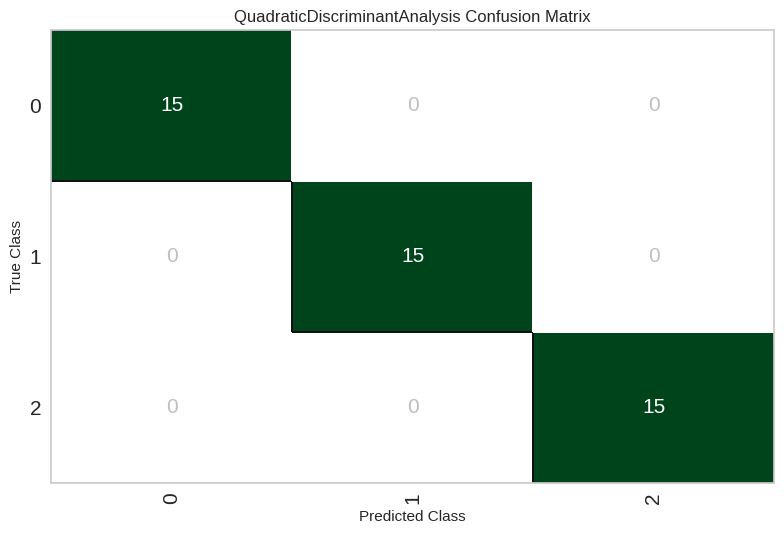

In [14]:
plot_model(qda_model, plot="confusion_matrix")

##### Feature Importance Plot

Attention, Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

In [18]:
extratree_model = create_model("et")
print(extratree_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9524,0.9898,0.9524,0.9583,0.9521,0.9286,0.9317
1,0.9524,1.0000,0.9524,0.9583,0.9521,0.9286,0.9317
2,0.9524,0.9932,0.9524,0.9583,0.9521,0.9286,0.9317
3,0.9524,1.0000,0.9524,0.9583,0.9521,0.9286,0.9317
4,0.9048,0.9558,0.9048,0.9048,0.9048,0.8571,0.8571
Mean,0.9429,0.9878,0.9429,0.9476,0.9427,0.9143,0.9168
Std,0.0190,0.0165,0.0190,0.0214,0.0189,0.0286,0.0298


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=0, verbose=0, warm_start=False)


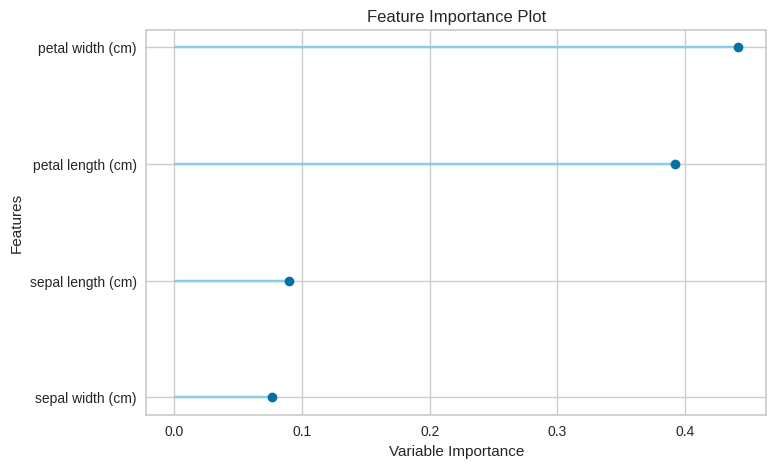

In [17]:
plot_model(extratree_model, plot="feature")

##### Modèle définitif pour le déploiement

In [20]:
final_model_qda = finalize_model(qda_model)
print(final_model_qda)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['sepal length (cm)',
                                             'sepal width (cm)',
                                             'petal length (cm)',
                                             'petal width (cm)'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categorical_i...
   

##### Sauvegarde du modèle pour le déploiement

In [21]:
# save_model(final_model, "modele_pour_deploiement")